In [1]:
import numpy
import matplotlib.pyplot as plt

# Randomization

In [2]:
true_values = numpy.random.choice([0, 1], 10000)

In [3]:
true_values[:10]

array([0, 0, 0, 1, 1, 0, 0, 0, 1, 1])

In [4]:
true_values.mean()

0.5043

In [7]:
def randomized_response(a, theta=0.5):
    """Randomized mechanism, tell truth with prob. theta."""
    coins = numpy.random.choice([True, False], len(a), p=(theta, 1-theta))
    # coins is used as a mask
    response = a.copy()
    noise = numpy.random.choice([0, 1], len(a))
    response[~coins] = noise[~coins]
    return response

In [9]:
randomized_response(true_values).mean()

0.4987

In [10]:
randomized_response(true_values, 0.8).mean()

0.5015

In [11]:
true_values_unfair = numpy.random.choice([0, 1], 10000, p=(0.2, 0.8))

In [12]:
true_values_unfair.mean()

0.7947

In [13]:
randomized_response(true_values_unfair).mean()

0.647

In [14]:
p = 0.8 # 1s in original data
theta = 0.5

In [15]:
theta * p + (1-theta)*0.5

0.65

In [16]:
randomized_response(true_values_unfair, 0.7).mean()

0.7026

In [17]:
p = 0.8 # 1s in original data
theta = 0.7

In [18]:
theta * p + (1-theta)*0.5

0.71

In [19]:
def approx_p(sample, theta=0.5):
    return (randomized_response(sample, theta).mean() - (1-theta)*0.5)/theta

In [20]:
approx_p(true_values_unfair, 0.6)

0.7858333333333333

In [21]:
approx_p(true_values_unfair, 0.7)

0.7847142857142858

In [22]:
true_values_unfair.mean()

0.7947

In [23]:
def gen_sample(p, n=10000):
    return numpy.random.choice([0, 1], 10000, p=(1-p, p))

In [24]:
def show_hists(p, theta):
    approx = [approx_p(gen_sample(p), theta) for _ in range(1000)]
    true_v = [gen_sample(p).mean() for _ in range(1000)]
    plt.hist(approx, bins=15, alpha=0.5, label="noisy")
    plt.hist(true_v, bins=15, alpha=0.5, label="true")
    plt.legend()

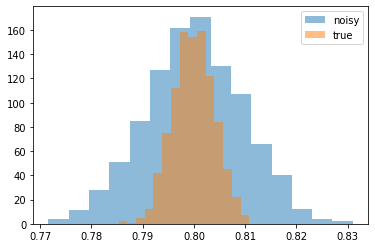

In [25]:
show_hists(0.8, 0.5)

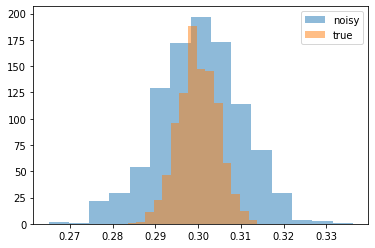

In [26]:
show_hists(0.3, 0.5)

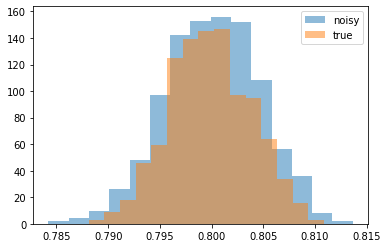

In [27]:
show_hists(0.8, 0.9)

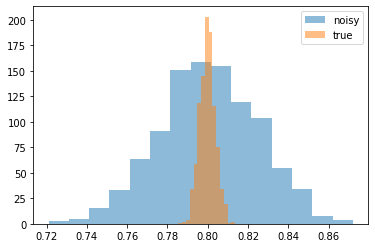

In [28]:
show_hists(0.8, 0.2)

Reminder

$$\left|\log\frac{\pi(a, x)}{\pi(a, x')}\right| \leq \epsilon$$

In [32]:
N = 10
x = numpy.zeros(N)
xp = x.copy()
xp[-1] = 1
a = x.copy()

In [36]:
numpy.fromiter(((randomized_response(x) == a).all() for _ in range(5000)), bool).mean()

0.0554

In [37]:
numpy.fromiter(((randomized_response(xp) == a).all() for _ in range(5000)), bool).mean()

0.0194

In [38]:
thetas = numpy.linspace(0.1, 0.5, 10)

In [39]:
thetas

array([0.1       , 0.14444444, 0.18888889, 0.23333333, 0.27777778,
       0.32222222, 0.36666667, 0.41111111, 0.45555556, 0.5       ])

In [40]:
ratios = [
    numpy.fromiter(((randomized_response(x, theta) == a).all() for _ in range(5000)), bool).mean() /
    numpy.fromiter(((randomized_response(xp, theta) == a).all() for _ in range(5000)), bool).mean()
    for theta in thetas
]

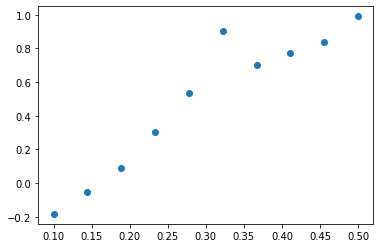

In [42]:
plt.scatter(thetas, numpy.log(ratios))

# Exponential mechanism

Example: Most popular pet

In [59]:
numpy.random.seed(42)

In [65]:
universe = ['cat', 'dog', 'hamster', 'fish']
probs = numpy.random.uniform(size=len(universe))
probs /= probs.sum()
values = numpy.random.choice(universe, size=100, p=probs)

In [66]:
values

array(['cat', 'cat', 'cat', 'cat', 'fish', 'fish', 'hamster', 'fish',
       'fish', 'cat', 'fish', 'hamster', 'fish', 'fish', 'cat', 'cat',
       'cat', 'dog', 'fish', 'fish', 'cat', 'hamster', 'dog', 'cat',
       'cat', 'cat', 'fish', 'cat', 'hamster', 'fish', 'cat', 'fish',
       'fish', 'cat', 'dog', 'cat', 'cat', 'cat', 'hamster', 'hamster',
       'cat', 'cat', 'fish', 'cat', 'cat', 'dog', 'fish', 'cat',
       'hamster', 'fish', 'cat', 'fish', 'cat', 'hamster', 'hamster',
       'hamster', 'cat', 'fish', 'cat', 'cat', 'cat', 'hamster', 'fish',
       'cat', 'hamster', 'cat', 'hamster', 'cat', 'fish', 'cat', 'fish',
       'cat', 'cat', 'cat', 'fish', 'fish', 'cat', 'hamster', 'fish',
       'hamster', 'hamster', 'cat', 'cat', 'fish', 'fish', 'hamster',
       'cat', 'cat', 'fish', 'fish', 'fish', 'fish', 'hamster', 'cat',
       'cat', 'fish', 'hamster', 'cat', 'cat', 'hamster'], dtype='<U7')

In [67]:
labels, counts = numpy.unique(values, return_counts=True)

<BarContainer object of 4 artists>

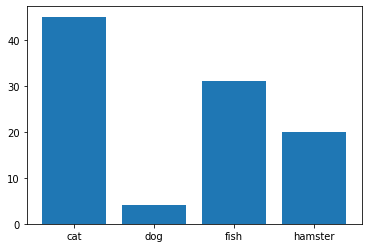

In [68]:
plt.bar(labels, counts)

In [69]:
q = counts

<BarContainer object of 4 artists>

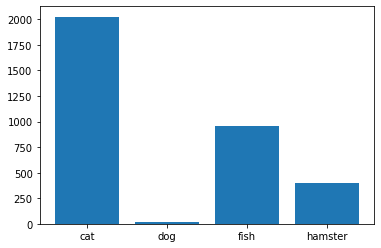

In [70]:
# also possible
plt.bar(labels, counts**2)

In [71]:
epsilon = 0.5

In [72]:
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum() # softmax

<BarContainer object of 4 artists>

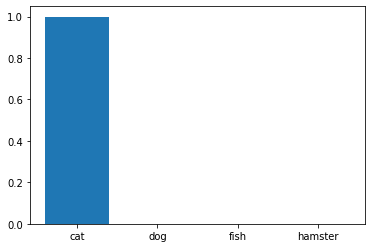

In [74]:
plt.bar(labels, pi)

<BarContainer object of 4 artists>

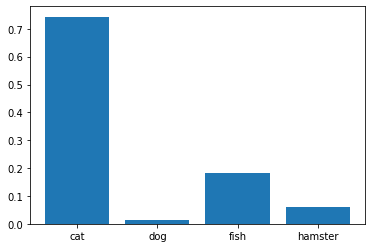

In [75]:
epsilon = 0.1
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum()
plt.bar(labels, pi)

<BarContainer object of 4 artists>

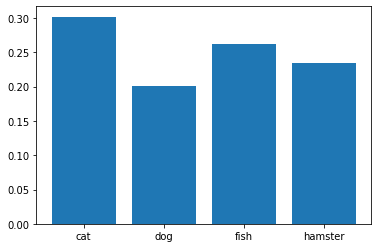

In [76]:
epsilon = 0.01
pi = numpy.exp(epsilon*q)/numpy.exp(epsilon*q).sum()
plt.bar(labels, pi)